In [17]:
%run ./Functions_All.ipynb

In [2]:
M_sun = const.M_sun
G = const.G
c = const.c

m_1 = b1_mass = 3.003e-6                # [M_sun]
m_2 = b2_mass = 1                       # [M_sun]

R_S = 2*(b1_mass + b2_mass)             # [G*M_sun/c**2]

mass_bin = b1_mass + b2_mass            # [M_sun]
SMA_bin = 1.013e8                       # [G*M_sun/c**2]  #SemiMajorAxis_binary

v_redmass = np.sqrt(mass_bin/SMA_bin)   # [np.sqrt(G*M_sun/G*M_sun/c**2) = c]

x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])     # [G*M_sun/c**2]
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])     # [G*M_sun/c**2]
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])     # [c]
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])     # [c]

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

t_max = (2*np.pi*np.sqrt(SMA_bin**3/(mass_bin)))    # [np.sqrt((G*M_sun/c**2)**3/G*M_sun) = np.sqrt((G*M_sun)**2/c**6) = G*M_sun/c**3]
res = 1e5
dt = (t_max/res)                                    # [G*M_sun/c**3]

positions_N = run_model(s_cm, m_1, m_2, t_max=t_max, dt=dt, mode = 'N', DL=True)[1]

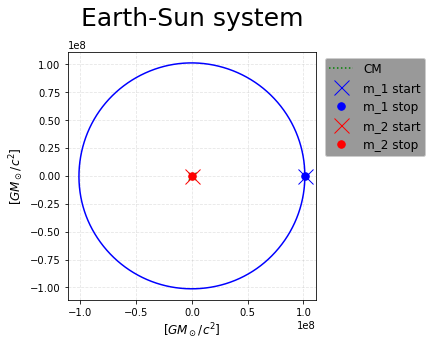

In [3]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_N, xlim=lim, ylim=lim, filename='Earth-Sun system', show=True, figsize=(6,6))

## 1) Testbody limit w/ Johans initial conditions

In [4]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000
v_redmass = np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N = 5 # Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)
# print(positions[2])

#~1 min at res=1e5

### Energy considerations

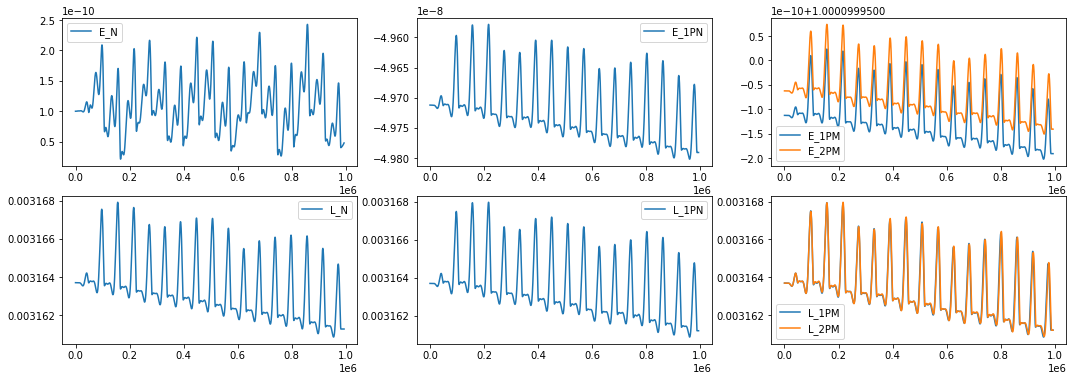

In [5]:
β = 1
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()


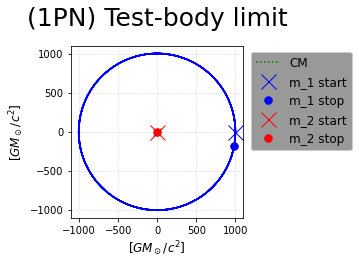

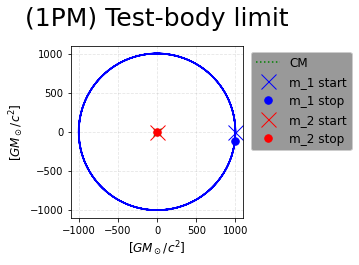

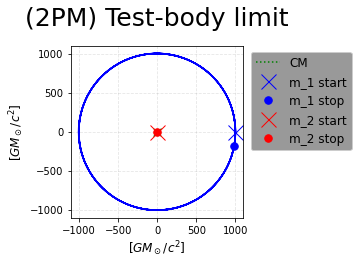

In [6]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_1PN, xlim=lim, ylim=lim, filename='(1PN) Test-body limit', figsize=(5,5), save=False)
orbPlotter(positions_1PM, xlim=lim, ylim=lim, filename='(1PM) Test-body limit', figsize=(5,5), save=False)
orbPlotter(positions_2PM, xlim=lim, ylim=lim, filename='(2PM) Test-body limit', figsize=(5,5), save=False)

## 2) Testbody limit w/ Johans initial conditions with eccentricity

In [7]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*5# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


In [8]:
eccOutput_N = eccentricity(positions_N[0])
eccOutput_1PN = eccentricity(positions_1PN[0])
eccOutput_1PM = eccentricity(positions_1PM[0])
eccOutput_2PM = eccentricity(positions_2PM[0])
print(f'meanEccentricity_N = {eccOutput_N[0]:.3f}')
print(f'meanEccentricity_1PN = {eccOutput_1PN[0]:.3f}')
print(f'meanEccentricity_1PM = {eccOutput_1PM[0]:.3f}')
print(f'meanEccentricity_2PM = {eccOutput_2PM[0]:.3f}')

eccOutput_N[3], eccOutput_2PM[3]

meanEccentricity_N = 0.752
meanEccentricity_1PN = 0.740
meanEccentricity_1PM = 0.732
meanEccentricity_2PM = 0.741


(array([[0.74979375, 0.74996143, 0.75438802, 0.75259218]]),
 array([[0.76585486, 0.75398294, 0.73469872, 0.70821892]]))

In [9]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_N,   xlim=lim, ylim=lim, filename='(N) Test-body limit with eccentricity', save=False, show=False)
orbPlotter(positions_1PN, xlim=lim, ylim=lim, filename='(1PN) Test-body limit with eccentricity', save=False, show=False) 
orbPlotter(positions_1PM, xlim=lim, ylim=lim, filename='(1PM) Test-body limit with eccentricity', save=False, show=False)
orbPlotter(positions_2PM, xlim=lim, ylim=lim, filename='(2PM) Test-body limit with eccentricity', save=False, show=False)

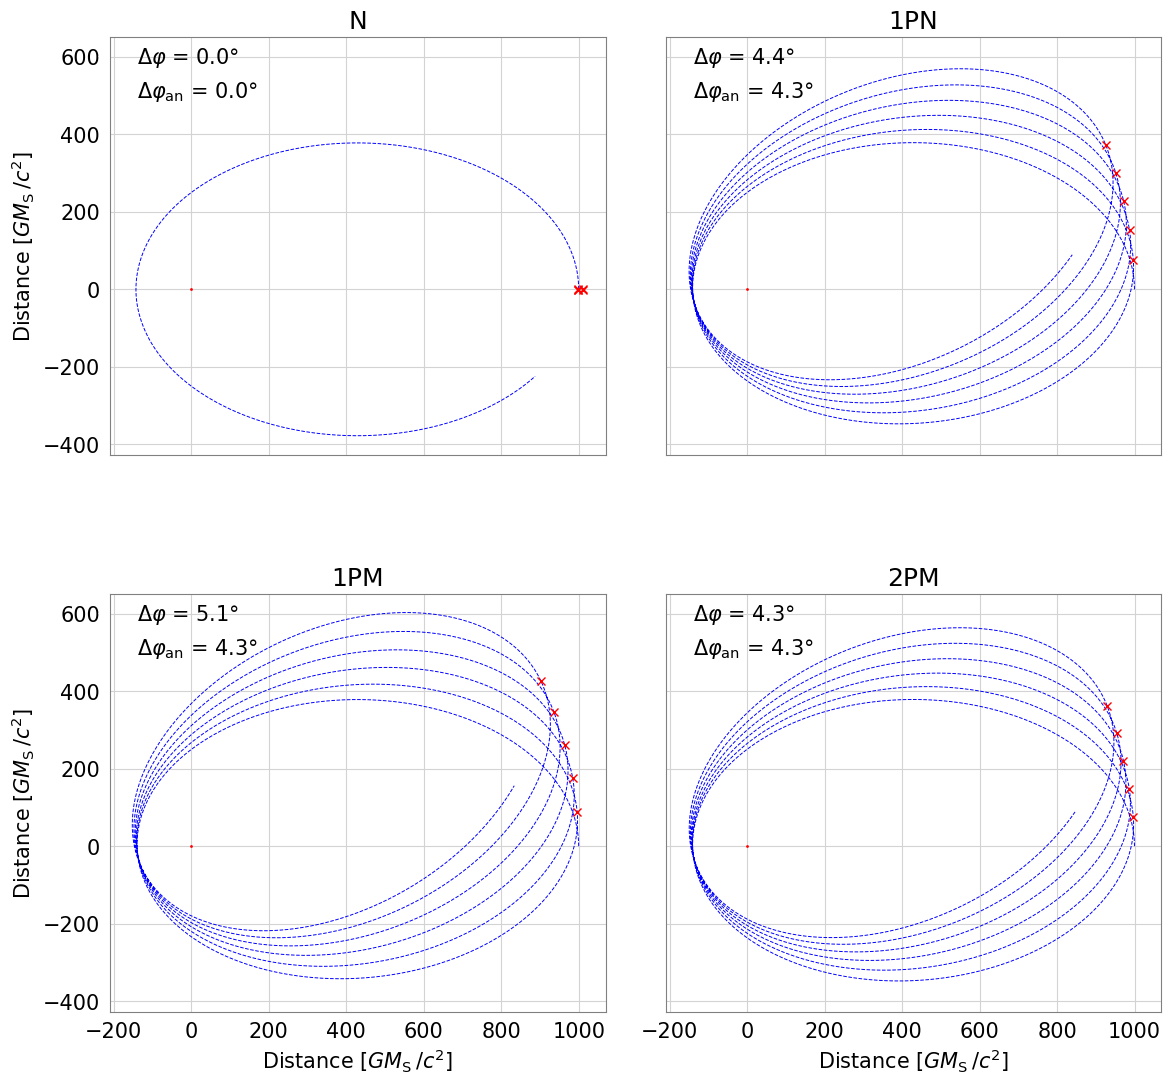

In [10]:
φ_N_an = perihelionShift_analytical(s, DL=True, mode='N')
φ_1PN_an = perihelionShift_analytical(s, DL=True, mode='1PN')
φ_1PM_an = perihelionShift_analytical(s, DL=True, mode='1PM')
φ_2PM_an = perihelionShift_analytical(s, DL=True, mode='2PM')

rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_1PN, peakIndices_1PN, peakPositions_1PN, peakAngles_1PN, perihelionShift_1PN = perihelionShift(positions_1PN[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = True)

axs[0,0].set_aspect('equal')
axs[0,0].plot(positions_N[0,0][0:14300], positions_N[0,1][0:14300], 'b--', lw=0.7)
axs[0,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_N*180/np.pi:.1f}°')
axs[0,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_N_an:.1f}°')
axs[0,0].plot(0,0,'r.', markersize=2)
axs[0,0].set_title('N')
# axs[0,0].set_ylim(-700, 700)
axs[0,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0,0].legend(loc=(-0.08, 0.82), frameon=False)

axs[0,1].set_aspect('equal')
axs[0,1].plot(positions_1PN[0,0], positions_1PN[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PN*180/np.pi:.1f}°')
axs[0,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PN_an:.1f}°')
axs[0,1].plot(0,0,'r.', markersize=2)
axs[0,1].set_title('1PN')
axs[0,1].legend(loc=(-0.08, 0.82), frameon=False)

axs[1,0].set_aspect('equal')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PM*180/np.pi:.1f}°')
axs[1,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PM_an:.1f}°')
axs[1,0].plot(0,0,'r.', markersize=2)
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].legend(loc=(-0.08, 0.82), frameon=False)

axs[1,1].set_aspect('equal')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_2PM*180/np.pi:.1f}°')
axs[1,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_2PM_an:.1f}°')
axs[1,1].plot(0,0,'r.', markersize=2)
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,1].legend(loc=(-0.08, 0.82), frameon=False)

for i in range(len(peakPositions_1PN)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (1PN:) {perihelionShift_1PN*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('test body periastron shift.jpg', dpi=300)


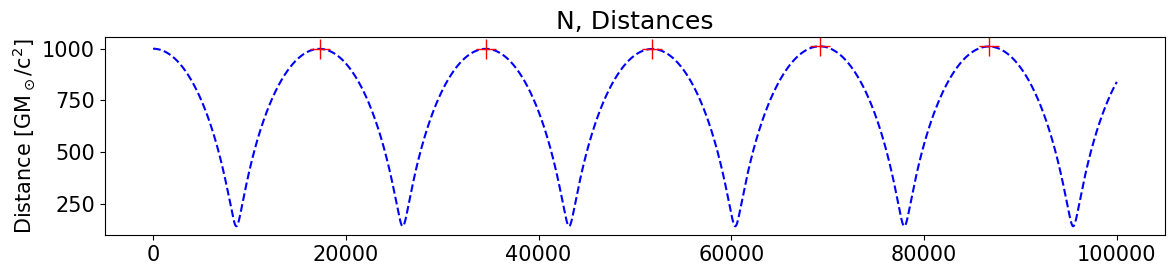

In [11]:
x = range(len(rs_N))

fig, axs = plt.subplots(1,1, figsize=(12,3))

axs.plot(x, rs_N, 'b--', lw=1.5)
axs.set_title('N, Distances')
axs.set_ylabel('Distance $\mathrm{[G M_\odot/c^2]}$')

for i in range(len(peakIndices_N)):
    axs.plot(peakIndices_N[i], rs_N[peakIndices_N[i]], 'r+', markersize=15)
fig.tight_layout()
# fig.savefig('rs plot.jpg', dpi=300)


### Energy considerations

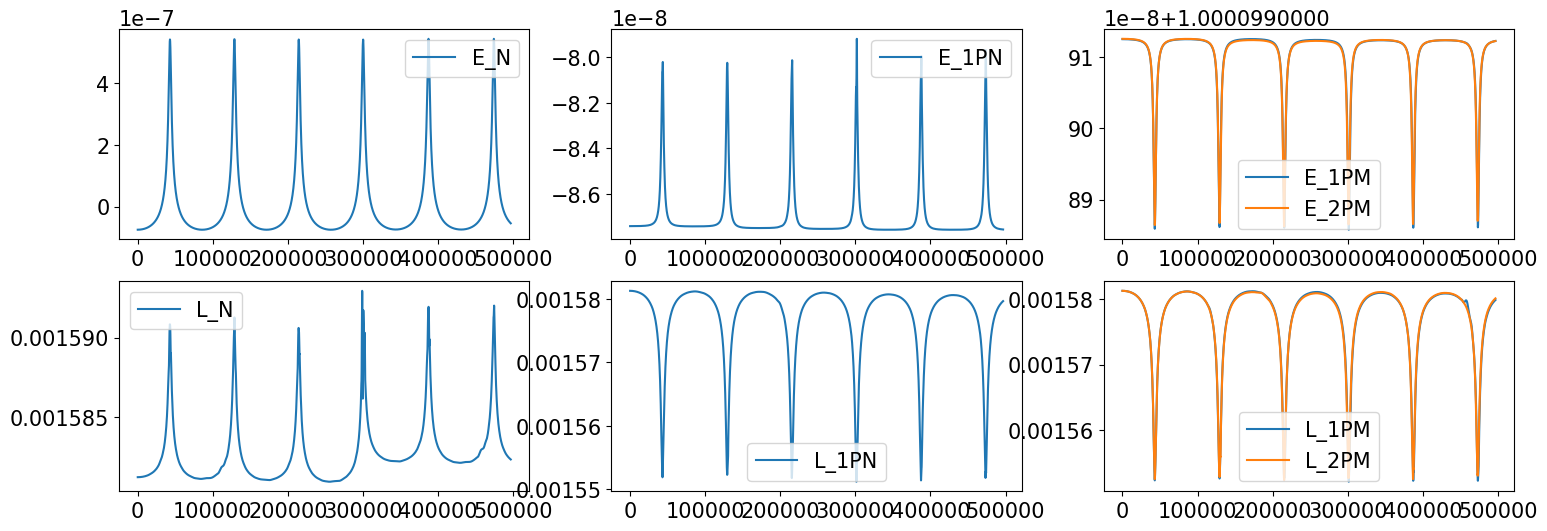

In [12]:
β = 1
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()


# Precession as a function of angular momentum

In [13]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 500

α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*5# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

leng = 21

φs_N_tbl_an = np.zeros(leng)
φs_1PN_tbl_an = np.zeros(leng)
φs_1PM_tbl_an = np.zeros(leng)
φs_2PM_tbl_an = np.zeros(leng)

φs_N_tbl = np.zeros(leng)
φs_1PN_tbl = np.zeros(leng)
φs_1PM_tbl = np.zeros(leng)   
φs_2PM_tbl = np.zeros(leng)

xs_tbl = np.zeros((leng, 2))
ps_tbl = np.zeros((leng, 2))


for i in range(leng):
    SMA_bin = 500
    SMA_bin += 500*i
    print(SMA_bin)
    v_redmass = α*np.sqrt(mass_bin/SMA_bin)
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1, m_2
    s_cm = sToCOM(s)

    t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
    res = 1e5
    dt = t_max/res

    positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)[1]
    positions_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)[1]
    positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)[1]
    positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)[1]

    xs_tbl[i] = x_1 - x_2
    ps_tbl[i] = γ(v_1, DL=True)*m_1*v_1

    φs_N_tbl_an[i] = perihelionShift_analytical(s, DL=True, mode='N')
    φs_1PN_tbl_an[i] = perihelionShift_analytical(s, DL=True, mode='1PN')
    φs_1PM_tbl_an[i] = perihelionShift_analytical(s, DL=True, mode='1PM')
    φs_2PM_tbl_an[i] = perihelionShift_analytical(s, DL=True, mode='2PM')

    φs_N_tbl[i] = perihelionShift(positions_N[0])[4]*180/np.pi
    φs_1PN_tbl[i] = perihelionShift(positions_1PN[0])[4]*180/np.pi
    φs_1PM_tbl[i] = perihelionShift(positions_1PM[0])[4]*180/np.pi   
    φs_2PM_tbl[i] = perihelionShift(positions_2PM[0])[4]*180/np.pi

500


/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500


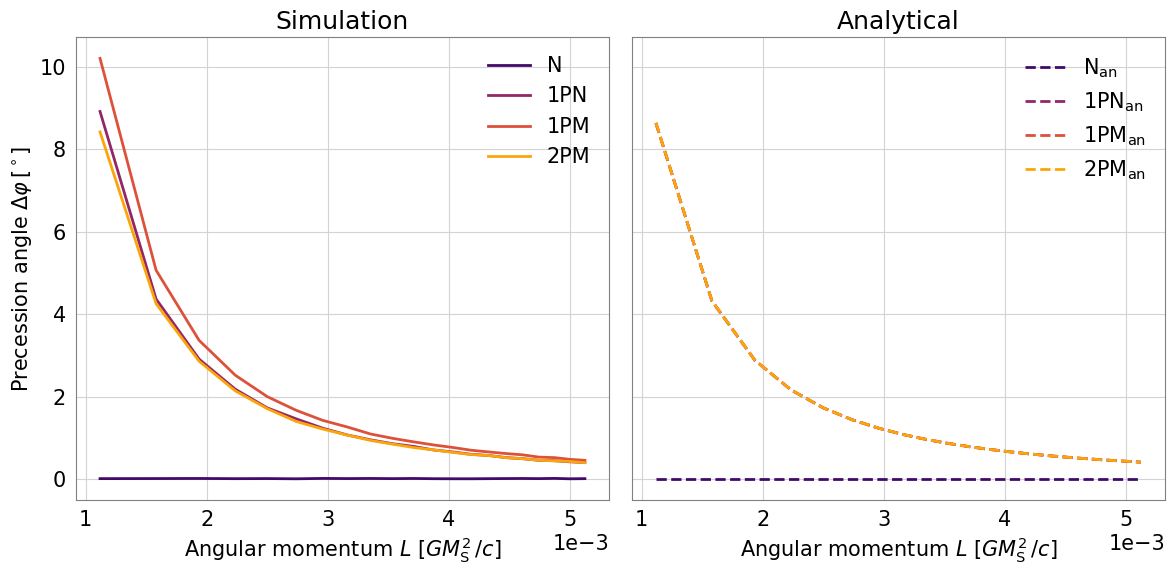

In [19]:
palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey=True)

L = np.cross(xs_tbl, ps_tbl)

axs[0].plot(L, φs_N_tbl, color=palette[0], lw=2, label='N')
axs[0].plot(L, φs_1PN_tbl, color=palette[1], lw=2, label='1PN')
axs[0].plot(L, φs_1PM_tbl, color=palette[2], lw=2, label='1PM')
axs[0].plot(L, φs_2PM_tbl, color=palette[3], lw=2, label='2PM')
axs[0].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[0].set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend(frameon=False)
axs[0].set_title('Simulation')

# axs[0].set_yscale('function',functions=(arctan, linear))


axs[1].plot(L, φs_N_tbl_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[1].plot(L, φs_1PN_tbl_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[1].plot(L, φs_1PM_tbl_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[1].plot(L, φs_2PM_tbl_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[1].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend(frameon=False)
axs[1].set_title('Analytical')


axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Similar mass precession(L) two.jpg', dpi=300)

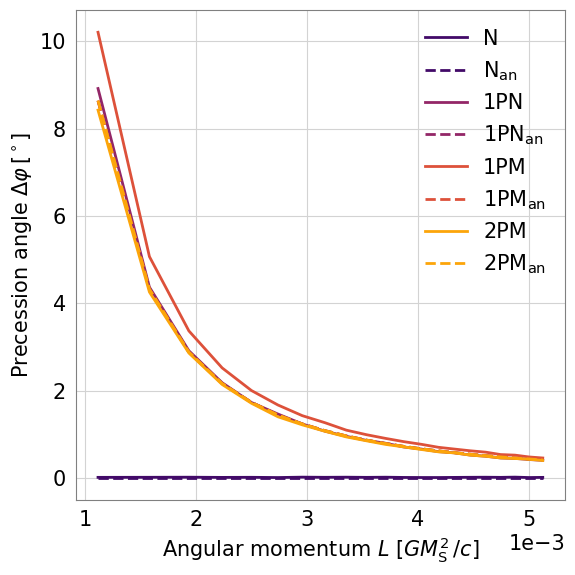

In [20]:
# def arctan(x):
#     return np.arctan(x)
# def linear(x):
#     return x

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(1,1, figsize=(6,6), sharex = True, sharey=True)

# axs[0].plot(Ls_N, θs_N, color=palette[0], lw=2, label='N')
ax.plot(L, φs_N_tbl, color=palette[0], lw=2, label='N')
ax.plot(L, φs_N_tbl_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
ax.plot(L, φs_1PN_tbl, color=palette[1], lw=2, label='1PN')
ax.plot(L, φs_1PN_tbl_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
ax.plot(L, φs_1PM_tbl, color=palette[2], lw=2, label='1PM')
ax.plot(L, φs_1PM_tbl_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
ax.plot(L, φs_2PM_tbl, color=palette[3], lw=2, label='2PM')
ax.plot(L, φs_2PM_tbl_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
ax.set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
ax.set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
ax.ticklabel_format(scilimits=(0,3))
ax.legend(frameon=False)

# axs[0].set_yscale('function',functions=(arctan, linear))


# axs[1].plot(Ls_N, θs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')



ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Similar mass precession(L) one.jpg', dpi=300)

## 3) Similar mass binary system

In [21]:
m_1 = b1_mass = 2
m_2 = b2_mass = 2

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 1000
v_redmass = np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N = 2 # Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

V_eff_N = TotalEnergy(s, DL = True, mode = 'N')[1]
V_eff_EIH = TotalEnergy(s, DL = True, mode = 'EIH')[1]
V_eff_1PM = TotalEnergy(s, DL = True, mode = '1PM')[1]
V_eff_2PM = TotalEnergy(s, DL = True, mode = '2PM')[1]

print(f'V_eff_N = {V_eff_N:.2e}')
print(f'V_eff_EIH = {V_eff_EIH:.2e}')
print(f'V_eff_1PM = {V_eff_1PM:.2e}')
print(f'V_eff_2PM = {V_eff_2PM:.2e}')

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)

#~1 min at res=1e5

V_eff_N = -4.00e+00
V_eff_EIH = -4.00e+00
V_eff_1PM = -2.03e-03
V_eff_2PM = -2.02e-03


In [22]:
# lim = 500
# orbPlotter(positions, DL = True, xlim=(-lim,lim), ylim=(-lim,lim))
orbPlotter(positions_N, filename='(N) Similar mass binary system', save=False, show=False)
orbPlotter(positions_1PN, filename='(1PN) Similar mass binary system', save=False, show=False)
orbPlotter(positions_1PM, filename='(1PM) Similar mass binary system', save=False, show=False)
orbPlotter(positions_2PM, filename='(2PM) Similar mass binary system', save=False, show=False)

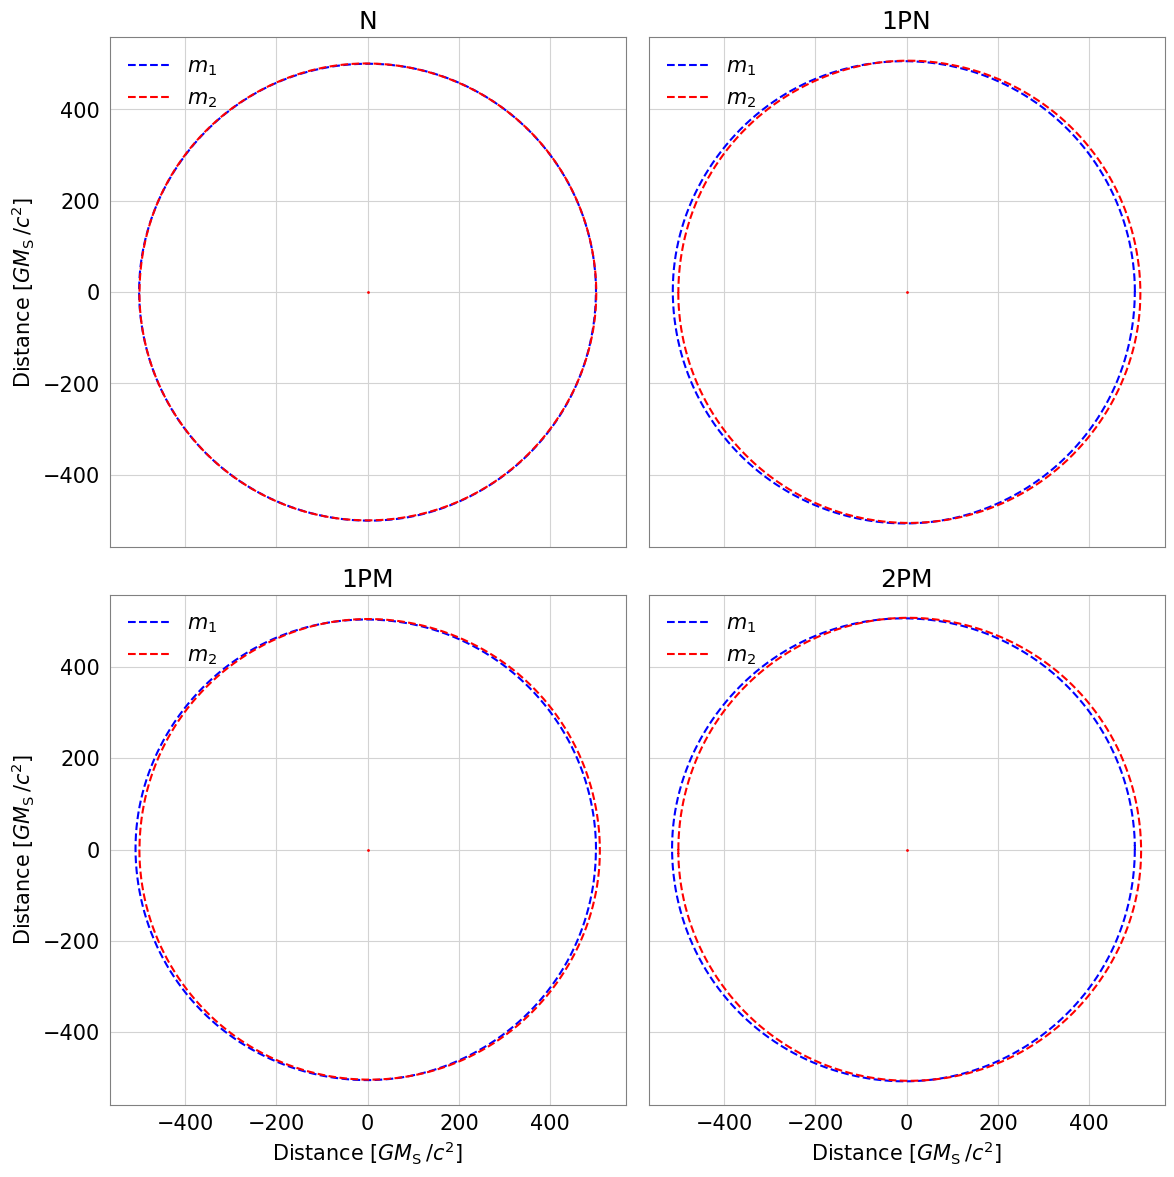

In [23]:
φ_N_an = perihelionShift_analytical(s, DL=True, mode='N')
φ_1PN_an = perihelionShift_analytical(s, DL=True, mode='1PN')
φ_1PM_an = perihelionShift_analytical(s, DL=True, mode='1PM')
φ_2PM_an = perihelionShift_analytical(s, DL=True, mode='2PM')

rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_1PN, peakIndices_1PN, peakPositions_1PN, peakAngles_1PN, perihelionShift_1PN = perihelionShift(positions_1PN[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

axs[0,0].set_aspect('equal')
axs[0,0].plot(positions_N[0,0][0:50000], positions_N[0,1][0:50000], 'b--', lw=1.5, label='$m_1$')
axs[0,0].plot(positions_N[1,0][80:50080], positions_N[1,1][80:50080], color='red', ls='--', lw=1.5, label='$m_2$')
# axs[0,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_N*180/np.pi:.1f}°')
# axs[0,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_N_an:.1f}°')
axs[0,0].plot(0,0,'r.', markersize=2)
axs[0,0].set_title('N')
axs[0,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0,0].legend(loc='upper left', frameon=False)

axs[0,1].set_aspect('equal')
axs[0,1].plot(positions_1PN[0,0][0:51200], positions_1PN[0,1][0:51200], 'b--', lw=1.5, label='$m_1$')
axs[0,1].plot(positions_1PN[1,0][0:51200], positions_1PN[1,1][0:51200], color='red', ls='--', lw=1.5, label='$m_2$')
# axs[0,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PN*180/np.pi:.1f}°')
# axs[0,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PN_an:.1f}°')
axs[0,1].plot(0,0,'r.', markersize=2)
axs[0,1].set_title('1PN')
axs[0,1].legend(loc='upper left', frameon=False)

axs[1,0].set_aspect('equal')
axs[1,0].plot(positions_1PM[0,0][0:50800], positions_1PM[0,1][0:50800], 'b--', lw=1.5, label='$m_1$')
axs[1,0].plot(positions_1PM[1,0][0:50800], positions_1PM[1,1][0:50800], color='red', ls='--', lw=1.5, label='$m_2$')
# axs[1,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PM*180/np.pi:.1f}°')
# axs[1,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PM_an:.1f}°')
axs[1,0].plot(0,0,'r.', markersize=2)
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].legend(loc='upper left', frameon=False)

axs[1,1].set_aspect('equal')
axs[1,1].plot(positions_2PM[0,0][0:51500], positions_2PM[0,1][0:51500], 'b--', lw=1.5, label='$m_1$')
axs[1,1].plot(positions_2PM[1,0][0:51500], positions_2PM[1,1][0:51500], color='red', ls='--', lw=1.5, label='$m_2$')
# axs[1,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_2PM*180/np.pi:.1f}°')
# axs[1,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_2PM_an:.1f}°')
axs[1,1].plot(0,0,'r.', markersize=2)
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,1].legend(loc='upper left', frameon=False)

# for i in range(len(peakPositions_1PN)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (1PN:) {perihelionShift_1PN*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('non-eccentric similar mass.jpg', dpi=300)

### Energy considerations

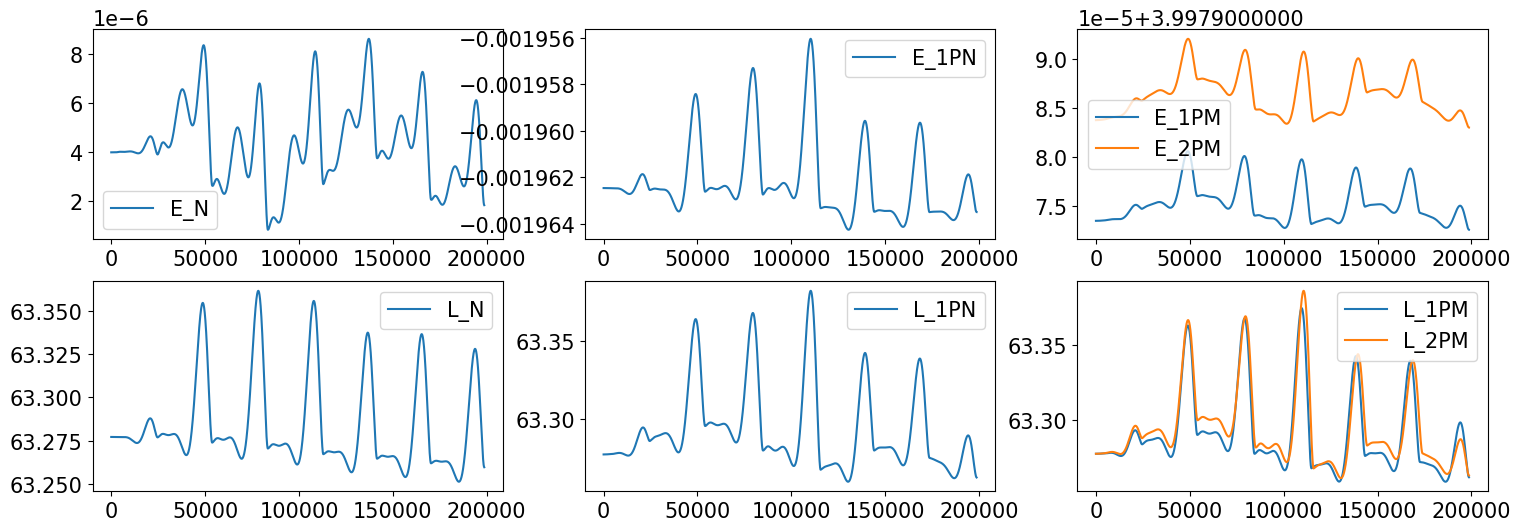

In [24]:
β = 1
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()


## 4) Similar mass binary system w/ eccentricty (hopefully)

In [25]:
m_1 = b1_mass = 1.5
m_2 = b2_mass = 2

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 1000

α = 0.7
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*15# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)

V_eff_N = TotalEnergy(s, DL = True, mode = 'N')[1]
V_eff_1PN= TotalEnergy(s, DL = True, mode = '1PN')[1]
V_eff_1PM = TotalEnergy(s, DL = True, mode = '1PM')[1]
V_eff_2PM = TotalEnergy(s, DL = True, mode = '2PM')[1]

print(f'V_eff_N = {V_eff_N:.2e}')
print(f'V_eff_1PN = {V_eff_1PN:.2e}')
print(f'V_eff_1PM = {V_eff_1PM:.2e}')
print(f'V_eff_2PM = {V_eff_2PM:.2e}')

#~1 min at res=1e5

/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


V_eff_N = -3.50e+00
V_eff_1PN = -3.50e+00
V_eff_1PM = -2.27e-03
V_eff_2PM = -2.27e-03


In [26]:
# lim = 500
# orbPlotter(positions, DL = True, xlim=(-lim,lim), ylim=(-lim,lim))

orbPlotter(positions_N, filename='(N) Similar mass binary system with eccentricity', save=False, show=False)
orbPlotter(positions_1PN, filename='(1PN) Similar mass binary system with eccentricity', save=False, show=False)
orbPlotter(positions_1PM, filename='(1PM) Similar mass binary system with eccentricity', save=False, show=False)
orbPlotter(positions_2PM, filename='(2PM) Similar mass binary system with eccentricity', save=False, show=False)

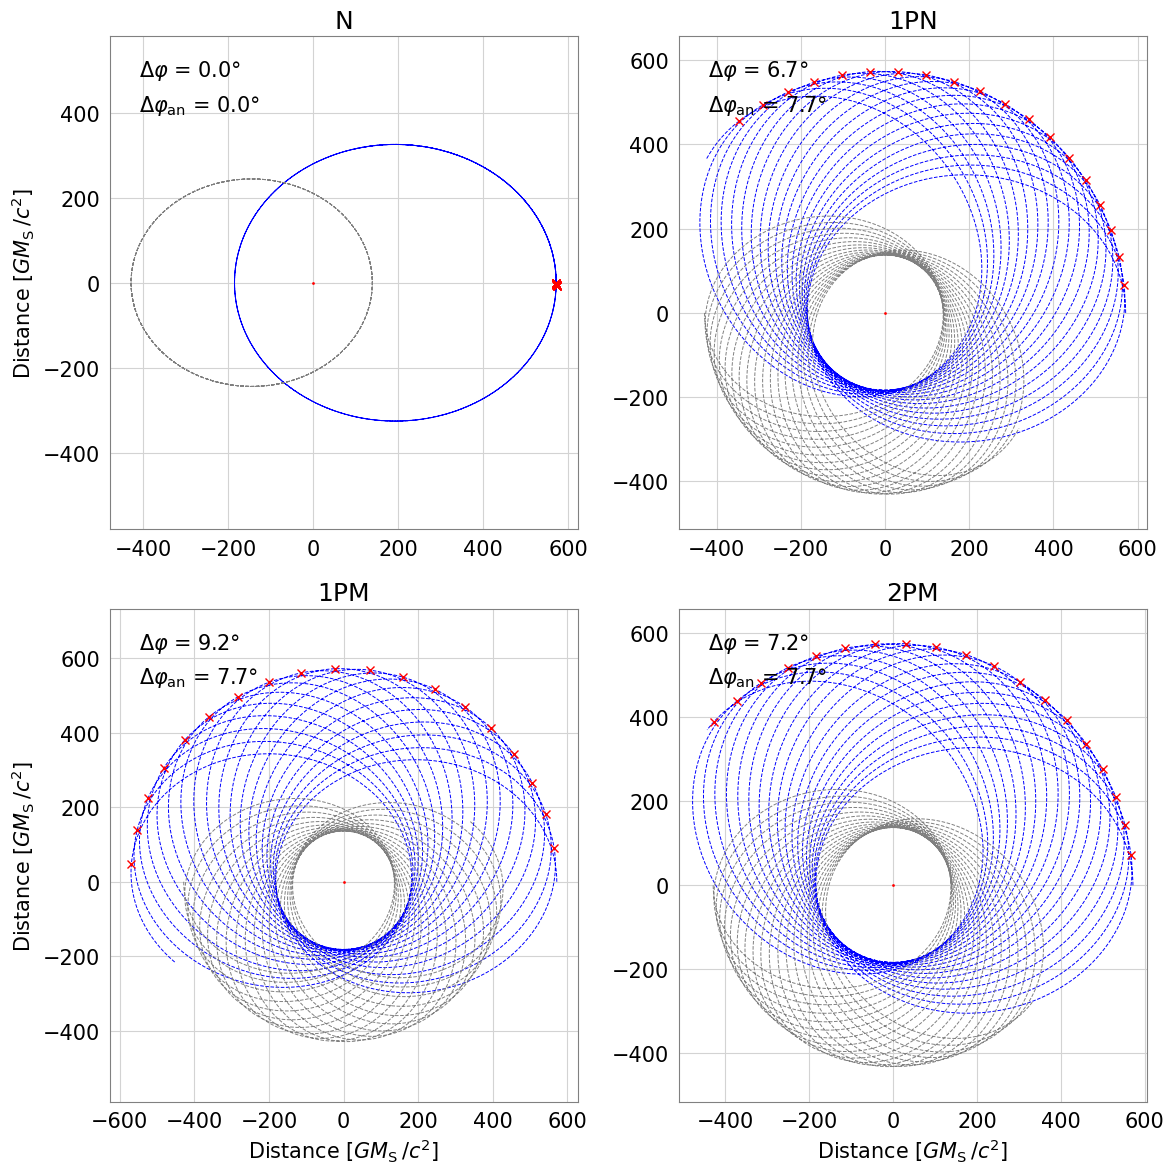

In [27]:


φ_N_an = perihelionShift_analytical(s, DL=True, mode='N')
φ_1PN_an = perihelionShift_analytical(s, DL=True, mode='1PN')
φ_1PM_an = perihelionShift_analytical(s, DL=True, mode='1PM')
φ_2PM_an = perihelionShift_analytical(s, DL=True, mode='2PM')

rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0][0:17300]) 
rs_1PN, peakIndices_1PN, peakPositions_1PN, peakAngles_1PN, perihelionShift_1PN = perihelionShift(positions_1PN[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(2,2, figsize=(12,12))

axs[0,0].set_aspect('equal', adjustable='datalim')
axs[0,0].plot(positions_N[0,0][0:17300], positions_N[0,1][0:17300], 'b--', lw=0.7)
axs[0,0].plot(positions_N[1,0][0:17300], positions_N[1,1][0:17300], color='gray', ls='--', lw=0.7)
axs[0,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_N*180/np.pi:.1f}°')
axs[0,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_N_an:.1f}°')
axs[0,0].plot(0,0,'r.', markersize=2)
axs[0,0].set_title('N')
axs[0,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0,0].legend(loc=(-0.08, 0.82), frameon=False)

axs[0,1].set_aspect('equal', adjustable='datalim')
axs[0,1].plot(positions_1PN[0,0], positions_1PN[0,1], 'b--', lw=0.7)
axs[0,1].plot(positions_1PN[1,0], positions_1PN[1,1], color='gray', ls='--', lw=0.7)
axs[0,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PN*180/np.pi:.1f}°')
axs[0,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PN_an:.1f}°')
axs[0,1].plot(0,0,'r.', markersize=2)
axs[0,1].set_title('1PN')
axs[0,1].legend(loc=(-0.08, 0.82), frameon=False)

axs[1,0].set_aspect('equal', adjustable='datalim')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(positions_1PM[1,0], positions_1PM[1,1], color='gray', ls='--', lw=0.7)
axs[1,0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_1PM*180/np.pi:.1f}°')
axs[1,0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_1PM_an:.1f}°')
axs[1,0].plot(0,0,'r.', markersize=2)
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].legend(loc=(-0.08, 0.82), frameon=False)

axs[1,1].set_aspect('equal', adjustable='datalim')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(positions_2PM[1,0], positions_2PM[1,1], color='gray', ls='--', lw=0.7)
axs[1,1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_2PM*180/np.pi:.1f}°')
axs[1,1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_2PM_an:.1f}°')
axs[1,1].plot(0,0,'r.', markersize=2)
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,1].legend(loc=(-0.08, 0.82), frameon=False)

for i in range(len(peakPositions_1PN)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (1PN:) {perihelionShift_1PN*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('similar mass periastron shift.jpg', dpi=300)

# Similar mass precession as a function of angular momentum

### Energy considerations

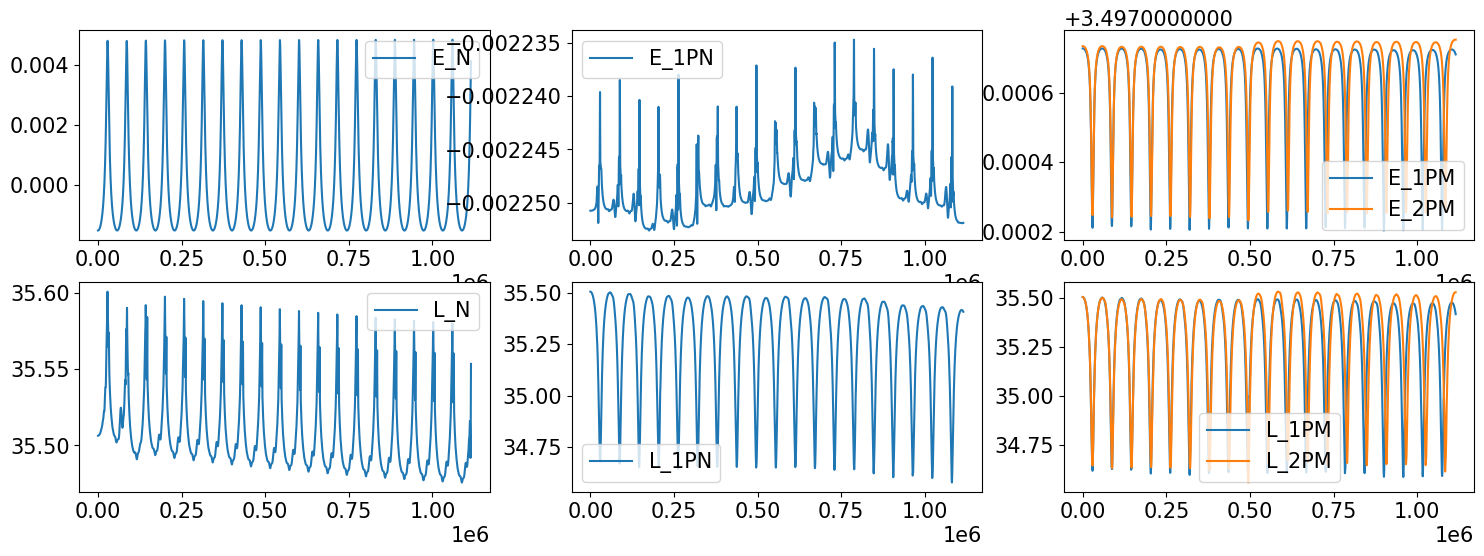

In [28]:
β = 1
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()


In [29]:
m_1 = b1_mass = 1.5
m_2 = b2_mass = 2

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 500

α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*5# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

leng = 21

φs_N_an = np.zeros(leng)
φs_1PN_an = np.zeros(leng)
φs_1PM_an = np.zeros(leng)
φs_2PM_an = np.zeros(leng)

φs_N = np.zeros(leng)
φs_1PN = np.zeros(leng)
φs_1PM = np.zeros(leng)   
φs_2PM = np.zeros(leng)

xs = np.zeros((leng, 2))
ps = np.zeros((leng, 2))


for i in range(leng):
    SMA_bin = 500
    SMA_bin += 500*i
    print(SMA_bin)
    v_redmass = α*np.sqrt(mass_bin/SMA_bin)
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1, m_2
    s_cm = sToCOM(s)

    t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
    res = 1e5
    dt = t_max/res

    positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)[1]
    positions_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)[1]
    positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)[1]
    positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)[1]
    t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
    t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
    t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
    t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)

    xs[i] = x_1 - x_2
    ps[i] = γ(v_1, DL=True)*m_1*v_1

    φs_N_an[i] = perihelionShift_analytical(s, DL=True, mode='N')
    φs_1PN_an[i] = perihelionShift_analytical(s, DL=True, mode='1PN')
    φs_1PM_an[i] = perihelionShift_analytical(s, DL=True, mode='1PM')
    φs_2PM_an[i] = perihelionShift_analytical(s, DL=True, mode='2PM')

    φs_N[i] = perihelionShift(positions_N[0])[4]*180/np.pi
    φs_1PN[i] = perihelionShift(positions_1PN[0])[4]*180/np.pi
    φs_1PM[i] = perihelionShift(positions_1PM[0])[4]*180/np.pi   
    φs_2PM[i] = perihelionShift(positions_2PM[0])[4]*180/np.pi

500


/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500


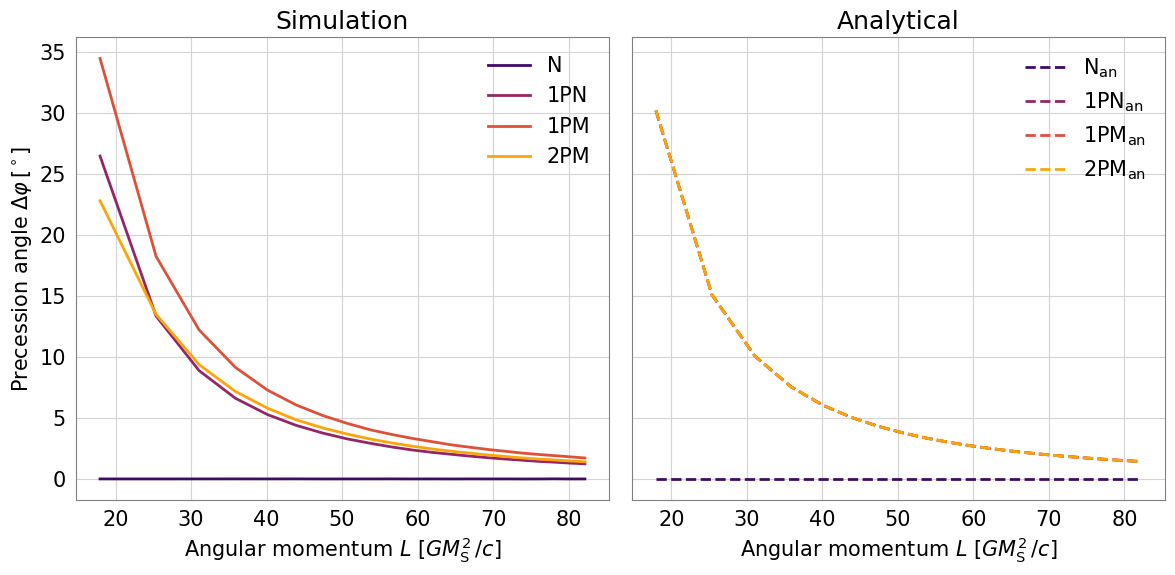

In [30]:
palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey=True)

L = np.cross(xs, ps)

axs[0].plot(L, φs_N, color=palette[0], lw=2, label='N')
axs[0].plot(L, φs_1PN, color=palette[1], lw=2, label='1PN')
axs[0].plot(L, φs_1PM, color=palette[2], lw=2, label='1PM')
axs[0].plot(L, φs_2PM, color=palette[3], lw=2, label='2PM')
axs[0].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[0].set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend(frameon=False)
axs[0].set_title('Simulation')

# axs[0].set_yscale('function',functions=(arctan, linear))


axs[1].plot(L, φs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[1].plot(L, φs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[1].plot(L, φs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[1].plot(L, φs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[1].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend(frameon=False)
axs[1].set_title('Analytical')


axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Similar mass precession(L) two.jpg', dpi=300)

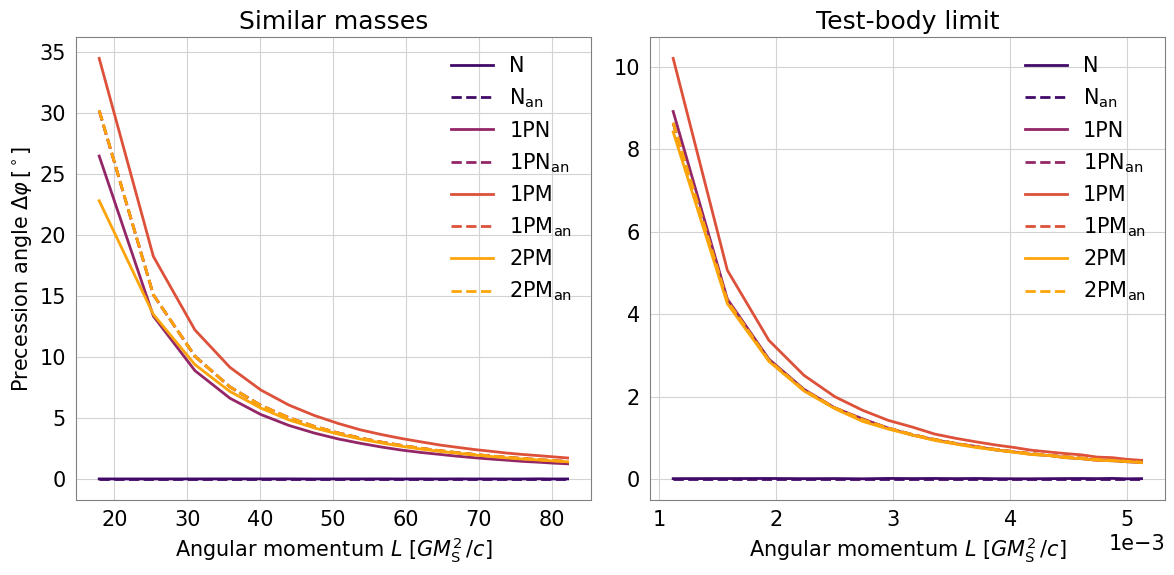

In [31]:
L = np.cross(xs, ps)
L_tbl = np.cross(xs_tbl, ps_tbl)

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,6))


axs[0].plot(L, φs_N, color=palette[0], lw=2, label='N')
axs[0].plot(L, φs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[0].plot(L, φs_1PN, color=palette[1], lw=2, label='1PN')
axs[0].plot(L, φs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[0].plot(L, φs_1PM, color=palette[2], lw=2, label='1PM')
axs[0].plot(L, φs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[0].plot(L, φs_2PM, color=palette[3], lw=2, label='2PM')
axs[0].plot(L, φs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[0].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[0].set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
axs[0].set_title('Similar masses')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend(frameon=False)

axs[1].plot(L_tbl, φs_N_tbl, color=palette[0], lw=2, label='N')
axs[1].plot(L_tbl, φs_N_tbl_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[1].plot(L_tbl, φs_1PN_tbl, color=palette[1], lw=2, label='1PN')
axs[1].plot(L_tbl, φs_1PN_tbl_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[1].plot(L_tbl, φs_1PM_tbl, color=palette[2], lw=2, label='1PM')
axs[1].plot(L_tbl, φs_1PM_tbl_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[1].plot(L_tbl, φs_2PM_tbl, color=palette[3], lw=2, label='2PM')
axs[1].plot(L_tbl, φs_2PM_tbl_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[1].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[1].set_title('Test-body limit')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend(frameon=False)



for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Precession(L) testbody+similar.jpg', dpi=300)

# Similar mass precession as a function of eccentricity

In [32]:
m_1 = b1_mass = 1.5
m_2 = b2_mass = 2

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 1000

α = 0.9
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*5# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

leng = 21

φs_N_an = np.zeros(leng)
φs_1PN_an = np.zeros(leng)
φs_1PM_an = np.zeros(leng)
φs_2PM_an = np.zeros(leng)

φs_N = np.zeros(leng)
φs_1PN = np.zeros(leng)
φs_1PM = np.zeros(leng)   
φs_2PM = np.zeros(leng)

xs = np.zeros((leng, 2))
ps = np.zeros((leng, 2))
αs = np.zeros(leng)


for i in range(leng):
    α = 0.9
    α -= 0.03*i
    print(α)
    v_redmass = α*np.sqrt(mass_bin/SMA_bin)
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1, m_2
    s_cm = sToCOM(s)

    positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)[1]
    positions_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)[1]
    positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)[1]
    positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)[1]

    αs[i] = α
    xs[i] = x_1 - x_2
    ps[i] = γ(v_1, DL=True)*m_1*v_1

    φs_N_an[i] = perihelionShift_analytical(s, DL=True, mode='N')
    φs_1PN_an[i] = perihelionShift_analytical(s, DL=True, mode='1PN')
    φs_1PM_an[i] = perihelionShift_analytical(s, DL=True, mode='1PM')
    φs_2PM_an[i] = perihelionShift_analytical(s, DL=True, mode='2PM')

    φs_N[i] = perihelionShift(positions_N[0])[4]*180/np.pi
    φs_1PN[i] = perihelionShift(positions_1PN[0])[4]*180/np.pi
    φs_1PM[i] = perihelionShift(positions_1PM[0])[4]*180/np.pi   
    φs_2PM[i] = perihelionShift(positions_2PM[0])[4]*180/np.pi

0.9
0.87
0.8400000000000001
0.81


/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


0.78
0.75
0.72
0.6900000000000001
0.66
0.63
0.6000000000000001
0.5700000000000001
0.54
0.51
0.48000000000000004
0.45000000000000007
0.42000000000000004
0.39
0.36
0.33000000000000007
0.30000000000000004


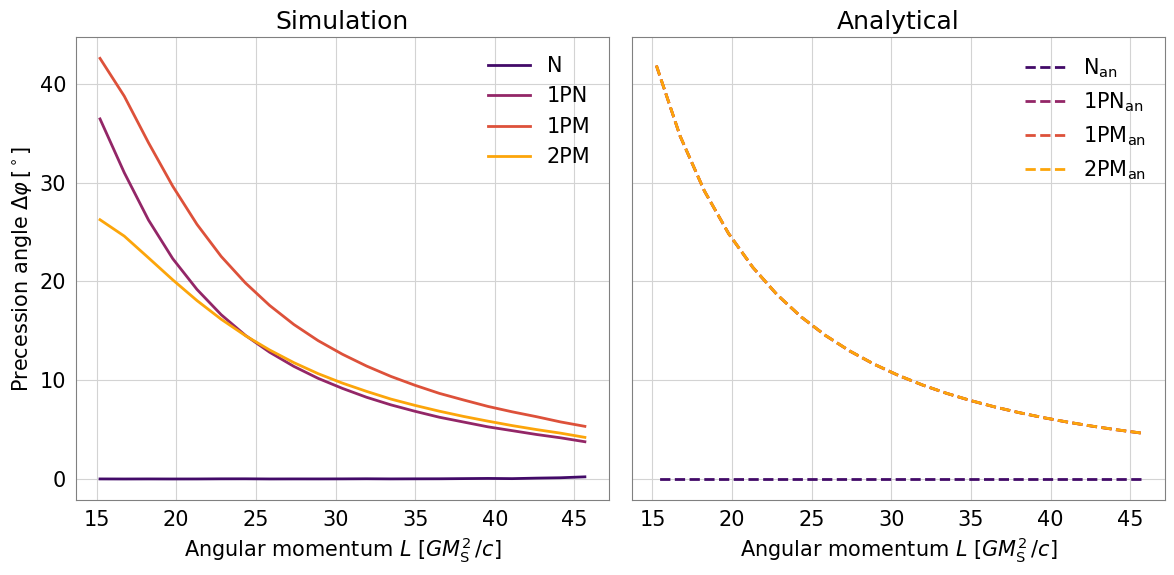

In [33]:
palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey=True)

L = np.cross(xs, ps)

axs[0].plot(L, φs_N, color=palette[0], lw=2, label='N')
axs[0].plot(L, φs_1PN, color=palette[1], lw=2, label='1PN')
axs[0].plot(L, φs_1PM, color=palette[2], lw=2, label='1PM')
axs[0].plot(L, φs_2PM, color=palette[3], lw=2, label='2PM')
axs[0].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[0].set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend(frameon=False)
axs[0].set_title('Simulation')

# axs[0].set_yscale('function',functions=(arctan, linear))


axs[1].plot(L, φs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[1].plot(L, φs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[1].plot(L, φs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[1].plot(L, φs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[1].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend(frameon=False)
axs[1].set_title('Analytical')


axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Similar mass precession(L) two.jpg', dpi=300)

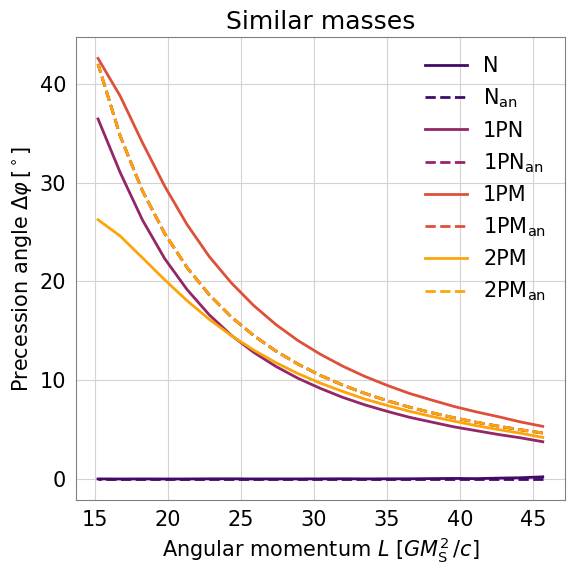

In [34]:
L = np.cross(xs, ps)

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(1,1, figsize=(6,6))


ax.plot(L, φs_N, color=palette[0], lw=2, label='N')
ax.plot(L, φs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
ax.plot(L, φs_1PN, color=palette[1], lw=2, label='1PN')
ax.plot(L, φs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
ax.plot(L, φs_1PM, color=palette[2], lw=2, label='1PM')
ax.plot(L, φs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
ax.plot(L, φs_2PM, color=palette[3], lw=2, label='2PM')
ax.plot(L, φs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
ax.set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
ax.set_ylabel('Precession angle $Δφ \, \mathrm{[^\circ]}$')
ax.set_title('Similar masses')
ax.ticklabel_format(scilimits=(0,3))
ax.legend(frameon=False)




ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Precession(L) testbody+similar.jpg', dpi=300)

# SCATTERING

In [35]:
%run ./Functions_All.ipynb
m_1 = 1e-6
m_2 = 5

x_1 = np.array([-1e4, 500.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.9,   0.])
v_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)


t_max = 4e4
res = 1e6
dt = t_max/res

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)


# For the graph in the paper
# m_1 = 1e-6
# m_2 = 5

# R_S = 2*(m_1 + m_2)

# x_1 = np.array([-3e3, 400.])
# x_2 = np.array([0.,    0.])
# v_1 = np.array([0.4,   0.])
# v_2 = np.array([0.,    0.])

In [36]:
lim = 1.2e4
# lims = 0
lims = (-lim,lim)
orbPlotter(positions_N, filename='(N) Test-body limit scattering', xlim=lims, ylim=lims, save=False, show=False)
orbPlotter(positions_1PN, filename='(1PN) Test-body limit scattering', xlim=lims, ylim=lims, save=False, show=False)
orbPlotter(positions_1PM, filename='(1PM) Test-body limit scattering', xlim=lims, ylim=lims, save=False, show=False)
orbPlotter(positions_2PM, filename='(2PM) Test-body limit scattering', xlim=lims, ylim=lims, save=False, show=False)

print(f'θ_N = {scatteringAngle(positions_N):.2f}°')
print(f'θ_1PN = {scatteringAngle(positions_1PN):.2f}°')
print(f'θ_1PM = {scatteringAngle(positions_1PM):.2f}°')
print(f'θ_2PM = {scatteringAngle(positions_2PM):.2f}°')

θ_N = 1.41°
θ_1PN = 2.63°
θ_1PM = 2.63°
θ_2PM = 2.58°


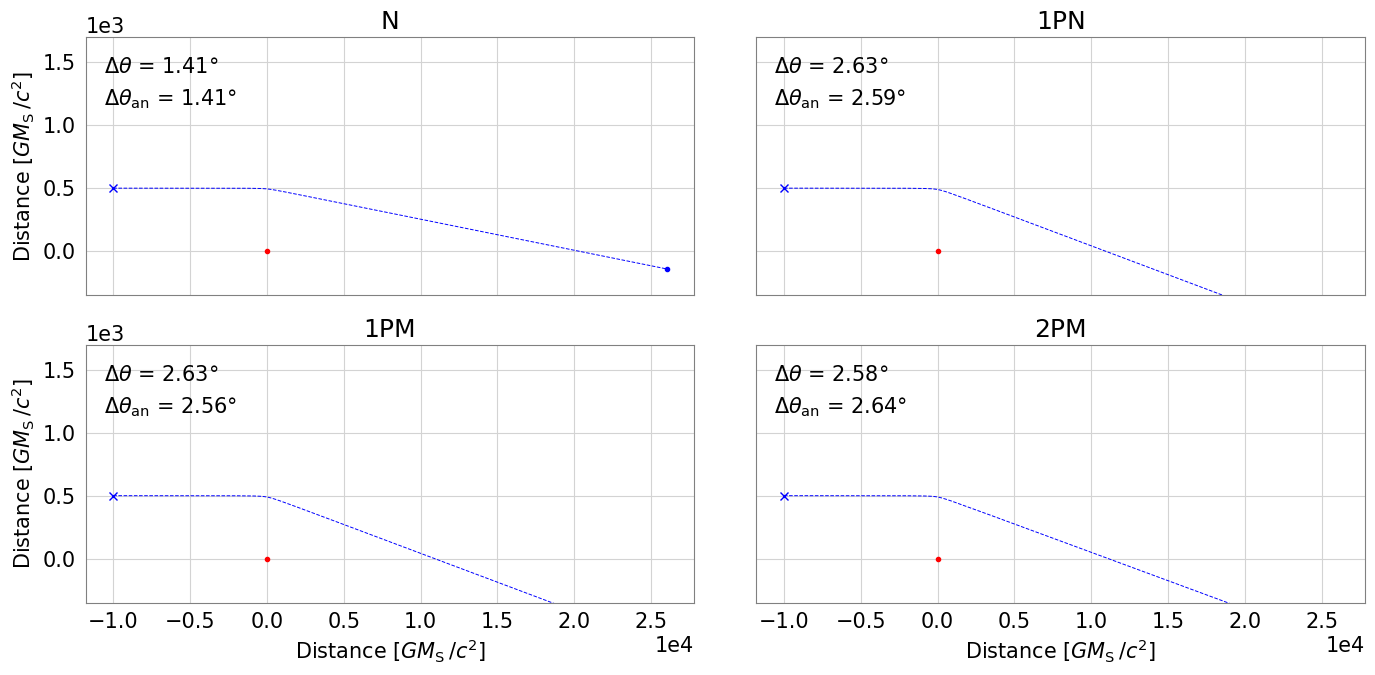

In [37]:
θ_N_an = scatteringAngle_analytical(s, DL=True, mode = 'N')
θ_1PN_an = scatteringAngle_analytical(s, DL=True, mode = '1PN')
θ_1PM_an = scatteringAngle_analytical(s, DL=True, mode = '1PM')
θ_2PM_an = scatteringAngle_analytical(s, DL=True, mode = '2PM')

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(2,2, figsize=(14,7), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_N):.2f}°')
axs[0,0].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_N_an[0]:.2f}°')
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'b.')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title('N')
axs[0,0].set_ylim(-350, 1700)
axs[0,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0,0].ticklabel_format(scilimits=(0,2))
axs[0,0].legend(loc=(-0.08, 0.68), frameon=False)


axs[0,1].plot(positions_1PN[0,0], positions_1PN[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_1PN):.2f}°')
axs[0,1].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_1PN_an[0]:.2f}°')
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_1PN[0,0][-1], positions_1PN[0,1][-1], 'b.')
axs[0,1].plot(positions_1PN[0,0][0], positions_1PN[0,1][0], 'bx')
axs[0,1].set_title('1PN')
axs[0,1].legend(loc=(-0.08, 0.68), frameon=False)

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_1PM):.2f}°')
axs[1,0].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_1PM_an[0]:.2f}°')
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'b.')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].ticklabel_format(scilimits=(0,2))
axs[1,0].legend(loc=(-0.08, 0.68), frameon=False)

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_2PM):.2f}°')
axs[1,1].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_2PM_an[0]:.2f}°')
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'b.')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,1].ticklabel_format(scilimits=(0,2))
axs[1,1].legend(loc=(-0.08, 0.68), frameon=False)

# for i in range(len(peakPositions_1PN)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()

# fig.savefig('test body scattering 2.jpg', dpi=300)


# Scattering as a function of angular momentum

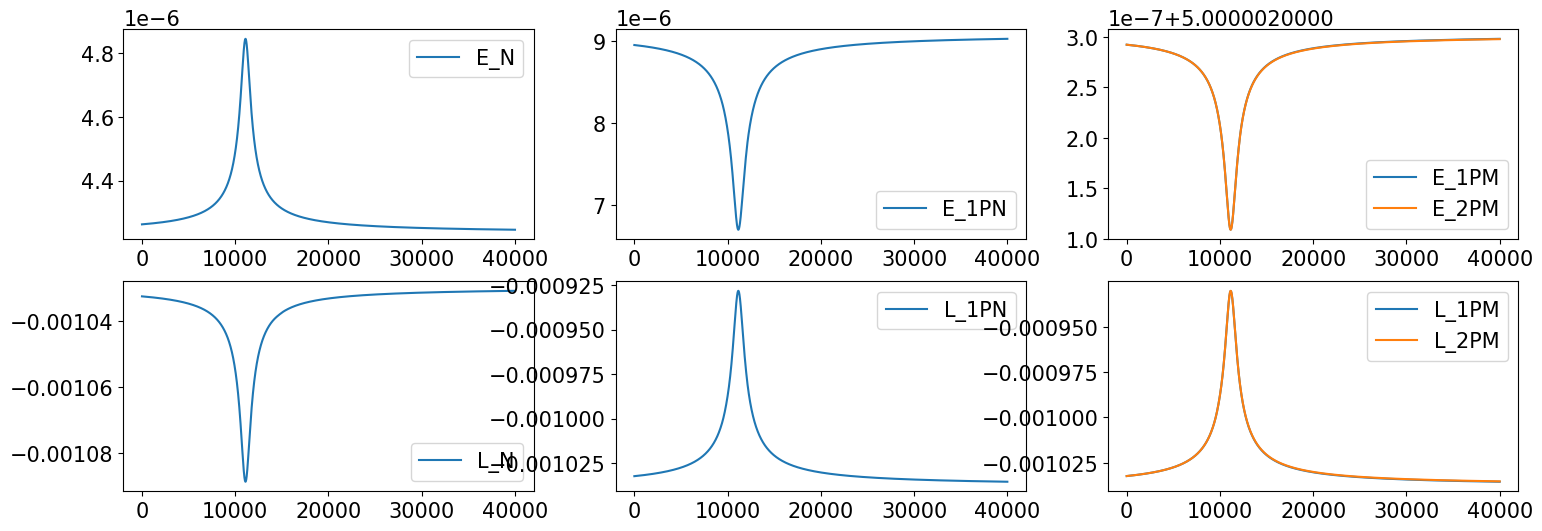

In [38]:
β = 1
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()


In [39]:
# m_1 = 1e-6
# m_2 = 1

# R_S = 2*(m_1 + m_2)

# x_1 = np.array([-1e4, 400.])
# x_2 = np.array([0.,    0.])
# v_1 = np.array([0.3,   0.])
# v_2 = np.array([0.,    0.])
# s = x_1, x_2, v_1, v_2, m_1, m_2
# s_cm = sToCOM(s)

m_1 = 3.7e-6
m_2 = 5

R_S = 2*(m_1 + m_2)

x_1 = np.array([-1.3e4, 389.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.264,   0.])
v_2 = np.array([0.,    0.])
s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)


t_max = 5e4
res = 1e4
dt = t_max/res

leng = 21

θs_N = np.zeros(leng)
θs_N_an = np.zeros(leng)
Ls_N = np.zeros(leng)

θs_1PN = np.zeros(leng)
θs_1PN_an = np.zeros(leng)
Ls_1PN = np.zeros(leng)

θs_1PM = np.zeros(leng)
θs_1PM_an = np.zeros(leng)
Ls_1PM = np.zeros(leng)

θs_2PM = np.zeros(leng)
θs_2PM_an = np.zeros(leng)
Ls_2PM = np.zeros(leng)


for i in range(leng):
    v_1 = np.array([0.3,   0.])
    v_1 += np.array([0.03*i, 0])
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2
    s_cm = sToCOM(s)

    t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
    t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
    t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
    t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)

    θs_N[i] = scatteringAngle(positions_N)
    θs_N_an[i], Ls_N[i] = scatteringAngle_analytical(s, mode ='N', DL=True)

    θs_1PN[i] = scatteringAngle(positions_1PN)
    θs_1PN_an[i], Ls_1PN[i] = scatteringAngle_analytical(s, mode ='1PN', DL=True)

    θs_1PM[i] = scatteringAngle(positions_1PM)
    θs_1PM_an[i], Ls_1PM[i] = scatteringAngle_analytical(s, mode ='1PM', DL=True)

    θs_2PM[i] = scatteringAngle(positions_2PM)
    θs_2PM_an[i], Ls_2PM[i] = scatteringAngle_analytical(s, mode ='2PM', DL=True)

# 5m 5s at res = 3e4

[0.3 0. ]
[0.33 0.  ]
[0.36 0.  ]
[0.39 0.  ]


/var/folders/js/7m_1fjvx1kb4r60sb806grd80000gn/T/ipykernel_32325/2467146974.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


[0.42 0.  ]
[0.45 0.  ]
[0.48 0.  ]
[0.51 0.  ]
[0.54 0.  ]
[0.57 0.  ]
[0.6 0. ]
[0.63 0.  ]
[0.66 0.  ]
[0.69 0.  ]
[0.72 0.  ]
[0.75 0.  ]
[0.78 0.  ]
[0.81 0.  ]
[0.84 0.  ]
[0.87 0.  ]
[0.9 0. ]


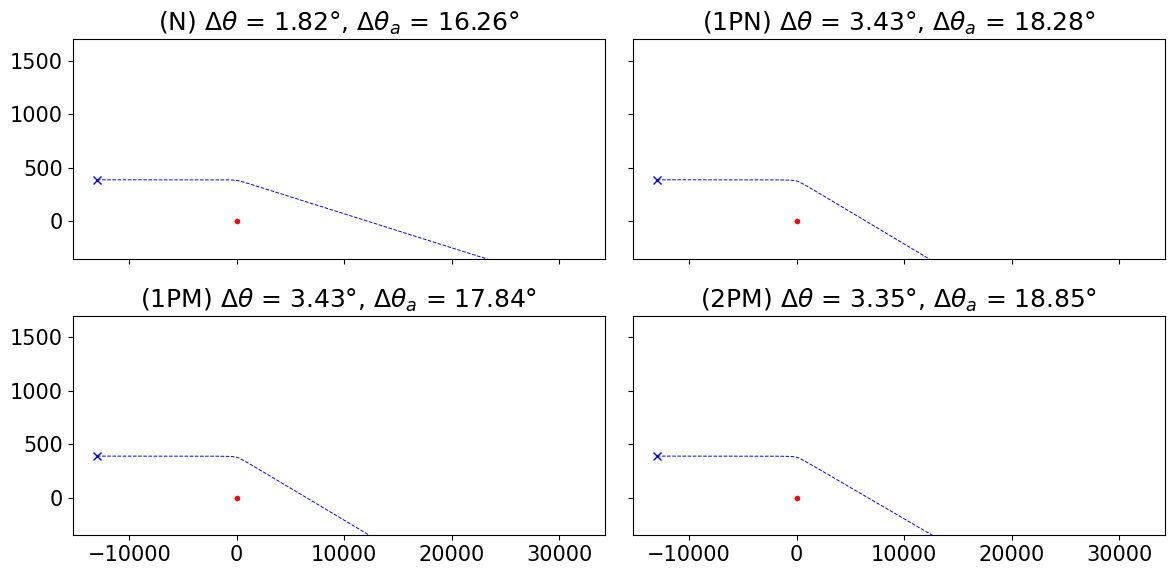

In [40]:
fig, axs = plt.subplots(2,2, figsize=(12,6), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'bo')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title(f'(N) $Δθ$ = {scatteringAngle(positions_N):.2f}°, $Δθ_a$ = {θs_N_an[0]:.2f}°')
axs[0,0].set_ylim(-350, 1700)

axs[0,1].plot(positions_1PN[0,0], positions_1PN[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_1PN[0,0][-1], positions_1PN[0,1][-1], 'bo')
axs[0,1].plot(positions_1PN[0,0][0], positions_1PN[0,1][0], 'bx')
axs[0,1].set_title(f'(1PN) $Δθ$ = {scatteringAngle(positions_1PN):.2f}°, $Δθ_a$ = {θs_1PN_an[0]:.2f}°')

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'bo')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title(f'(1PM) $Δθ$ = {scatteringAngle(positions_1PM):.2f}°, $Δθ_a$ = {θs_1PM_an[0]:.2f}°')

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'bo')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title(f'(2PM) $Δθ$ = {scatteringAngle(positions_2PM):.2f}°, $Δθ_a$ = {θs_2PM_an[0]:.2f}°')
# for i in range(len(peakPositions_1PN)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
fig.tight_layout()


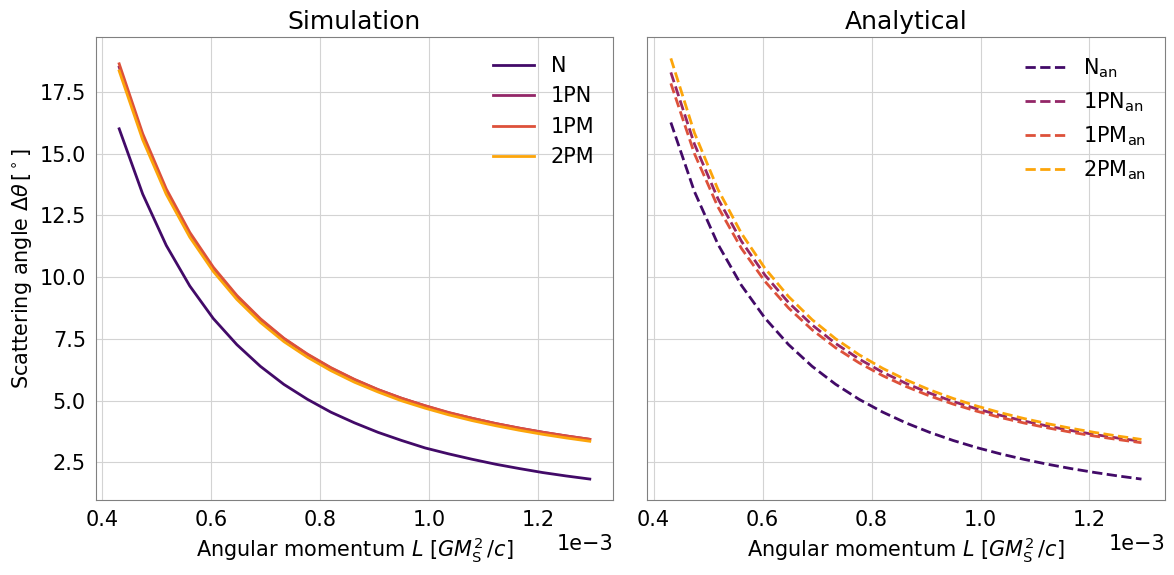

In [41]:
# def arctan(x):
#     return np.arctan(x)
# def linear(x):
#     return x

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey=True)

axs[0].plot(Ls_N, θs_N, color=palette[0], lw=2, label='N')
axs[0].plot(Ls_1PN, θs_1PN, color=palette[1], lw=2, label='1PN')
axs[0].plot(Ls_1PM, θs_1PM, color=palette[2], lw=2, label='1PM')
axs[0].plot(Ls_2PM, θs_2PM, color=palette[3], lw=2, label='2PM')
axs[0].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[0].set_ylabel('Scattering angle $Δθ \, \mathrm{[^\circ]}$')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend(frameon=False)
axs[0].set_title('Simulation')

# axs[0].set_yscale('function',functions=(arctan, linear))


axs[1].plot(Ls_N, θs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')
axs[1].plot(Ls_1PN, θs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
axs[1].plot(Ls_1PM, θs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
axs[1].plot(Ls_2PM, θs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
axs[1].set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend(frameon=False)
axs[1].set_title('Analytical')


axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Scattering angle of L multiplot.jpg', dpi=300)

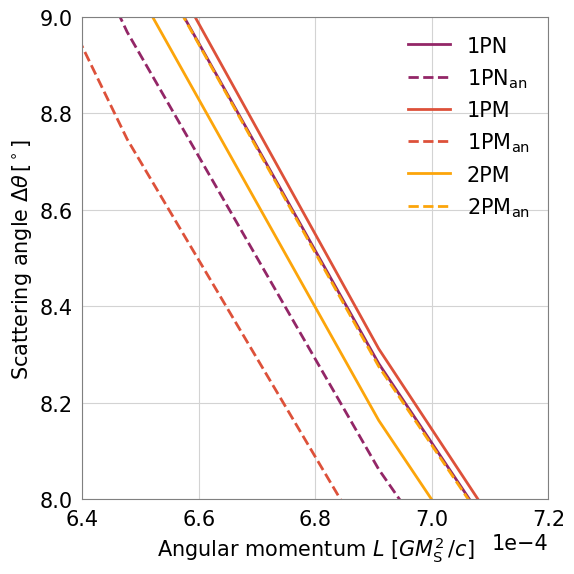

In [42]:
# def arctan(x):
#     return np.arctan(x)
# def linear(x):
#     return x

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(1,1, figsize=(6,6), sharex = True, sharey=True)

# axs[0].plot(Ls_N, θs_N, color=palette[0], lw=2, label='N')
ax.plot(Ls_1PN, θs_1PN, color=palette[1], lw=2, label='1PN')
ax.plot(Ls_1PN, θs_1PN_an, color=palette[1], ls='--', lw=2, label='$\mathrm{1PN_{an}}$')
ax.plot(Ls_1PM, θs_1PM, color=palette[2], lw=2, label='1PM')
ax.plot(Ls_1PM, θs_1PM_an, color=palette[2], ls='--', lw=2, label='$\mathrm{1PM_{an}}$')
ax.plot(Ls_2PM, θs_2PM, color=palette[3], lw=2, label='2PM')
ax.plot(Ls_2PM, θs_2PM_an, color=palette[3], ls='--', lw=2, label='$\mathrm{2PM_{an}}$')
ax.set_xlabel('Angular momentum $L\ [G M_\mathrm{S}^2 \,/ c]$')
ax.set_ylabel('Scattering angle $Δθ \, \mathrm{[^\circ]}$')
ax.ticklabel_format(scilimits=(0,3))
ax.legend(frameon=False)
ax.set_xlim(0.64e-3, 0.72e-3)
ax.set_ylim(8, 9)

# axs[0].set_yscale('function',functions=(arctan, linear))


# axs[1].plot(Ls_N, θs_N_an, color=palette[0], ls='--', lw=2, label='$\mathrm{N_{an}}$')



ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Scattering angle of L multiplot zoomed.jpg', dpi=300)

In [ ]:
G = const.G
c = const.c

x_1, x_2, v_1, v_2, m_1, m_2 = s

Δφa = perihelionShift_analytical(s, mode = 'N', DL=True)
print(f'Δφ (in radians) = {Δφa*np.pi/180:.3f}, Δφ (in angles) = {Δφa:.3f}')
ΔΦa_poul = perihelionShift_analytical(s, mode='2PM', DL=True)
print(f'ΔΦ_poul (in radians) = {ΔΦa_poul*np.pi/180:.3f}, ΔΦ_poul (in angles) = {ΔΦa_poul:.3f}')

## Eccentricity failure

In [ ]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

mass_bin = b1_mass + b2_mass
R_S = 2*(b1_mass + b2_mass)
SMA_bin = 100

y = 8

α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*y# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e7
dt = t_max/res

t_N, positions_N, velocities_N, r_N, t_max_N, sol_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)
t_1PN, positions_1PN, velocities_1PN, r_1PN, t_max_1PN, sol_1PN = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PN', DL=True)
t_1PM, positions_1PM, velocities_1PM, r_1PM, t_max_1PM, sol_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)
t_2PM, positions_2PM, velocities_2PM, r_2PM, t_max_2PM, sol_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)

rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_1PN, peakIndices_1PN, peakPositions_1PN, peakAngles_1PN, perihelionShift_1PN = perihelionShift(positions_1PN[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])
    
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = 'row')

axs[0,0].set_aspect('equal')
axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].set_title(f'Newtonian, Perihelion shift = {perihelionShift_N*180/np.pi:.3f}°')
# axs[0,0].set_ylim(-1200, 1200)

axs[0,1].set_aspect('equal')
axs[0,1].plot(positions_1PN[0,0], positions_1PN[0,1], 'b--', lw=0.7)
axs[0,1].set_title(f'1PN, Perihelion shift = {perihelionShift_1PN*180/np.pi:.3f}°')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())

axs[1,0].set_aspect('equal')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].set_title(f'1PM, Perihelion shift = {perihelionShift_1PM*180/np.pi:.3f}°')

axs[1,1].set_aspect('equal')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].set_title(f'2PM, Perihelion shift = {perihelionShift_2PM*180/np.pi:.3f}°')

for i in range(len(peakPositions_1PN)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_1PN[i,0], peakPositions_1PN[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (1PN:) {perihelionShift_1PN*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('Eccentricity COM failure.jpg', dpi=300)

    
    

### Energy considerations

In [ ]:
β = 1000
S = slice(0, -1, β)
Ls_N = np.zeros((len(t_N[S]), 1))
Ls_1PN = np.zeros((len(t_N[S]), 1))
Ls_1PM = np.zeros((len(t_N[S]), 1))
Ls_2PM = np.zeros((len(t_N[S]), 1))
Es_N = np.zeros((len(t_N[S]), 2))
Es_1PN = np.zeros((len(t_N[S]), 2))
Es_1PM = np.zeros((len(t_N[S]), 2))
Es_2PM = np.zeros((len(t_N[S]), 2))

for i in range(len(t_N[S])):
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_N[0,:,i*β], positions_N[1,:,i*β], velocities_N[0,:,i*β], velocities_N[1,:,i*β], m_1, m_2
    Ls_N[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_N[i] = (TotalEnergy(s, mode = 'N'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PN[0,:,i*β], positions_1PN[1,:,i*β], velocities_1PN[0,:,i*β], velocities_1PN[1,:,i*β], m_1, m_2
    Ls_1PN[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PN[i] = (TotalEnergy(s, mode = '1PN'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_1PM[0,:,i*β], positions_1PM[1,:,i*β], velocities_1PM[0,:,i*β], velocities_1PM[1,:,i*β], m_1, m_2
    Ls_1PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_1PM[i] = (TotalEnergy(s, mode = '1PM'))
    s = x_1, x_2, v_1, v_2, m_1, m_2 = positions_2PM[0,:,i*β], positions_2PM[1,:,i*β], velocities_2PM[0,:,i*β], velocities_2PM[1,:,i*β], m_1, m_2
    Ls_2PM[i] = np.cross(x_1 - x_2, m_1*v_1*γ(v_1, DL=True))
    Es_2PM[i] = (TotalEnergy(s, mode = '2PM'))

fig, axs = plt.subplots(2,3, figsize=(18,6))
axs[0,0].plot(t_N[S], Es_N[:,0], label = 'E_N')
axs[0,1].plot(t_N[S], Es_1PN[:,0], label = 'E_1PN')
axs[0,2].plot(t_N[S], Es_1PM[:,0], label = 'E_1PM')
axs[0,2].plot(t_N[S], Es_2PM[:,0], label = 'E_2PM')
axs[1,0].plot(t_N[S], Ls_N, label = 'L_N')
axs[1,1].plot(t_N[S], Ls_1PN, label = 'L_1PN')
axs[1,2].plot(t_N[S], Ls_1PM, label = 'L_1PM')
axs[1,2].plot(t_N[S], Ls_2PM, label = 'L_2PM')

for row in range(len(axs)):
    for ax in axs[row]:
        ax.legend()
